In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

In [28]:
dfTrain = pd.read_csv('MNIST_train.csv')
dfTrain.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
y = dfTrain['label'].values.flatten() 
y

array([1, 0, 1, ..., 7, 6, 9])

In [4]:
x = dfTrain.drop(['label'],axis=1).values

In [5]:
def display(x, y):
    _, axes = plt.subplots(nrows=2, ncols=5, figsize=(12, 8))
    for ax, image, label in zip(axes.ravel(), x, y):
        ax.imshow(image.reshape(28, 28), cmap=plt.cm.gray)
        ax.set_title("Training: %i" % label)

In [6]:
X_train,X_test, y_train, y_test = train_test_split(x,y,test_size=0.5)

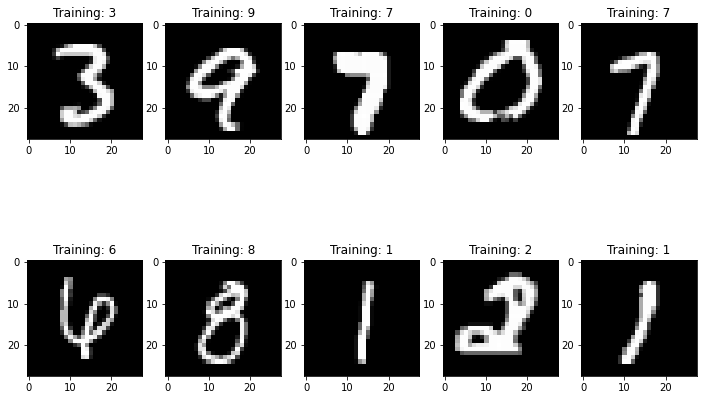

In [7]:
display(X_train, y_train)

In [11]:
svm_clf = svm.SVC()
%time svm_clf.fit(X_train, y_train)

CPU times: user 38.5 s, sys: 234 ms, total: 38.7 s
Wall time: 38.9 s


SVC()

In [12]:
%time predicted = svm_clf.predict(X_test)

CPU times: user 1min 10s, sys: 235 ms, total: 1min 10s
Wall time: 1min 10s


In [13]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2114
           1       0.98      0.99      0.98      2341
           2       0.97      0.97      0.97      2100
           3       0.96      0.96      0.96      2164
           4       0.96      0.98      0.97      2029
           5       0.97      0.96      0.96      1888
           6       0.98      0.98      0.98      2085
           7       0.97      0.97      0.97      2154
           8       0.96      0.96      0.96      2077
           9       0.96      0.95      0.96      2048

    accuracy                           0.97     21000
   macro avg       0.97      0.97      0.97     21000
weighted avg       0.97      0.97      0.97     21000



In [14]:
cum_pca = PCA(n_components=28*28)
cum_pca.fit(X_train)
cumsum = np.cumsum(cum_pca.explained_variance_ratio_)
cumsum

array([0.09711034, 0.16928497, 0.23117709, 0.28450935, 0.33282256,
       0.37536083, 0.40842159, 0.43736494, 0.46512081, 0.48872962,
       0.50973477, 0.53028813, 0.54745533, 0.56447733, 0.58026818,
       0.59500411, 0.60805031, 0.62100383, 0.63292876, 0.64449839,
       0.65514725, 0.6652499 , 0.67481011, 0.6839533 , 0.6928635 ,
       0.70124043, 0.7093415 , 0.71703915, 0.72441349, 0.73128391,
       0.73787641, 0.74428056, 0.75027239, 0.75621507, 0.7618746 ,
       0.76738654, 0.7725538 , 0.77746498, 0.78225854, 0.78690431,
       0.79141204, 0.79584663, 0.80006937, 0.80408683, 0.80792124,
       0.81168048, 0.81531653, 0.81879194, 0.82217073, 0.82537541,
       0.82855737, 0.83166271, 0.83461905, 0.83745828, 0.840259  ,
       0.84295113, 0.8456053 , 0.84816299, 0.85069384, 0.85317455,
       0.85560156, 0.85800088, 0.86027314, 0.86252515, 0.86467116,
       0.86675545, 0.86880626, 0.87075746, 0.87270057, 0.87457064,
       0.87643134, 0.87824762, 0.88001595, 0.8817381 , 0.88341

In [15]:
d = np.argmax(cumsum >= 0.95) + 1
d

153

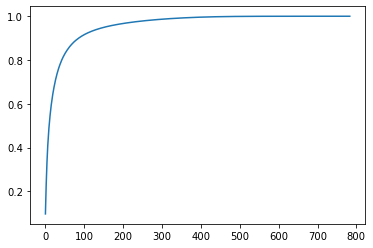

In [16]:
plt.plot(cumsum)

In [22]:
pca = PCA(n_components=20)
x_reduced = pca.fit_transform(X_train)
x_recovered = pca.inverse_transform(x_reduced)

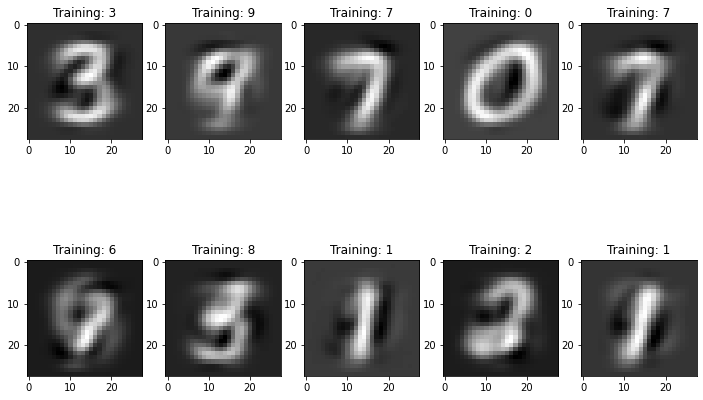

In [23]:
display(x_recovered, y_train)

In [24]:
pcasvm_clf = Pipeline([
        ("pca", PCA(n_components=20)),
        ("svc", svm.SVC())
    ])

%time pcasvm_clf.fit(X_train, y_train)

CPU times: user 5.83 s, sys: 631 ms, total: 6.46 s
Wall time: 1.86 s


Pipeline(steps=[('pca', PCA(n_components=10)), ('svc', SVC())])

In [25]:
# Predict the value of the digit on the test subset
%time predicted_svc_pca = pcasvm_clf.predict(X_test)

CPU times: user 6.26 s, sys: 519 ms, total: 6.78 s
Wall time: 5.67 s


In [26]:
print(metrics.classification_report(y_test, predicted_svc_pca))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2114
           1       0.98      0.98      0.98      2341
           2       0.93      0.95      0.94      2100
           3       0.91      0.90      0.90      2164
           4       0.92      0.89      0.91      2029
           5       0.91      0.92      0.92      1888
           6       0.95      0.97      0.96      2085
           7       0.96      0.94      0.95      2154
           8       0.90      0.90      0.90      2077
           9       0.87      0.88      0.87      2048

    accuracy                           0.93     21000
   macro avg       0.93      0.93      0.93     21000
weighted avg       0.93      0.93      0.93     21000

